In [1]:
import numpy as np
import pandas as pd

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


<span style="color:blue">
below block is used to read in csv file "Collisions.csv" as pd dataframe
</span>

In [58]:
# The code was removed by Watson Studio for sharing.

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.288688,47.532714,1,29800,29800,1177964,Unmatched,Block,NaN,BEACON ER AVE S BETWEEN S PORTLAND ST AND S CH...,...,NaN,NaN,NaN,4315006.0,NaN,NaN,NaN,0,0,N
1,NaN,NaN,2,115700,115700,10097005,Unmatched,NaN,NaN,NaN,...,NaN,NaN,NaN,10097005.0,NaN,NaN,NaN,0,0,N
2,-122.355556,47.727318,3,1358,1358,3568600,Matched,Block,NaN,GREENWOOD AVE N BETWEEN N 134TH ST AND N 136TH ST,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
3,-122.317563,47.618764,4,70700,70700,2806057,Matched,Block,NaN,E DENNY WAY BETWEEN 11TH AVE AND 12TH AVE,...,Dry,Other,NaN,7065007.0,NaN,32,One parked--one moving,0,0,N
4,-122.361015,47.538551,5,53600,53600,2127310,Matched,Block,NaN,DELRIDGE WAY SW BETWEEN SW MYRTLE ST AND SW OR...,...,Dry,Daylight,NaN,6137017.0,NaN,14,From same direction - both going straight - on...,0,0,N


In [4]:
# make a function to check missing data
def check_missing_data(df_name):
    missing_data=df_name.isnull()

    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")   

# check missing data in the original list
check_missing_data(df)

X
False    213675
True       7469
Name: X, dtype: int64

Y
False    213675
True       7469
Name: Y, dtype: int64

OBJECTID
False    221144
Name: OBJECTID, dtype: int64

INCKEY
False    221144
Name: INCKEY, dtype: int64

COLDETKEY
False    221144
Name: COLDETKEY, dtype: int64

REPORTNO
False    221144
Name: REPORTNO, dtype: int64

STATUS
False    221144
Name: STATUS, dtype: int64

ADDRTYPE
False    217432
True       3712
Name: ADDRTYPE, dtype: int64

INTKEY
True     149370
False     71774
Name: INTKEY, dtype: int64

LOCATION
False    216558
True       4586
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     120403
False    100741
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     209373
False     11771
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE
False    221143
True          1
Name: SEVERITYCODE, dtype: int64

SEVERITYDESC
False    221144
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    194740
True      26404
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    22

<span style="color:blue">
as above, we can see that data are missing in different columns, but some columns can be droppped directly based on what they are  
  
now start data cleaning  
</span>

In [59]:
# copy df to df_clean
df_clean=df.copy()

# drop code=0 
drop_index=df_clean[df_clean.SEVERITYCODE=='0'].index
df_clean.drop(drop_index, inplace=True)

# drop STATUS=Unmatched
drop_index=df_clean[df_clean.STATUS=='Unmatched'].index
df_clean.drop(drop_index, inplace=True)

# logic test between PERSONCOUNT and (PEDCOUNT + PEDCYLCOUNT), (INJURIES + SERIOUSINJURIES + FATALITIES)
drop_index=df_clean[df_clean.PERSONCOUNT<(df_clean.PEDCOUNT+df_clean.PEDCYLCOUNT)].index
df_clean.drop(drop_index, inplace=True)

drop_index=df_clean[df_clean.PERSONCOUNT<(df_clean.INJURIES+df_clean.SERIOUSINJURIES+df_clean.FATALITIES)].index
df_clean.drop(drop_index, inplace=True)

# drop "Unknown", "Other"
drop_index=df_clean[(df_clean.COLLISIONTYPE=='Other')|(df_clean.COLLISIONTYPE=='Unknown')].index
df_clean.drop(drop_index, inplace=True)

drop_index=df_clean[(df_clean.WEATHER=='Other')|(df_clean.WEATHER=='Unknown')].index
df_clean.drop(drop_index, inplace=True)

drop_index=df_clean[(df_clean.ROADCOND=='Other')|(df_clean.ROADCOND=='Unknown')].index
df_clean.drop(drop_index, inplace=True)

drop_index=df_clean[(df_clean.LIGHTCOND=='Other')|(df_clean.LIGHTCOND=='Unknown')].index
df_clean.drop(drop_index, inplace=True)

In [60]:
# drop unnecessary columns, keep objectID for identification
df_clean.drop(['X','Y','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','INCDATE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY', "INJURIES", "SERIOUSINJURIES", "FATALITIES"],axis=1,inplace=True)
df_clean.head(1)

,OBJECTID,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
2,3,Block,1,Left Turn,2,0,0,2,4/2/2013 3:10:00 PM,Mid-Block (not related to intersection),11.0,NaN,N,Overcast,Dry,Daylight,NaN,NaN,28,N


In [61]:
# fill empty with 'N' in below columns
df_clean.fillna({'INATTENTIONIND':'N','PEDROWNOTGRNT':'N','SPEEDING':'N'},inplace=True)

# replace 'Y/N' into '1/0' in column 'UNDERINFL'
df_clean.UNDERINFL.replace(['Y','1'],1,inplace=True)
df_clean.UNDERINFL.replace(['N','0'],0,inplace=True)

# drop rows with empty value in any column
df_clean=df_clean.dropna()

In [62]:
# data standardzation

# replace "Y/N" into "1/0"
cols=['INATTENTIONIND','PEDROWNOTGRNT','SPEEDING']
df_clean[cols]=df_clean[cols].replace('Y',1)
df_clean[cols]=df_clean[cols].replace('N',0)

<span style="color:blue">
the data cleaning is almost done, let's check data balance
</span>

In [63]:
# check data balance
df_clean.SEVERITYCODE.value_counts()

1     96716
2     48336
2b     2100
3       215
Name: SEVERITYCODE, dtype: int64

<span style="color:blue">
here we can see that the data is quite inbalanced, let's firstly bin code-2b and code-3 into one category 'High' since there are too few samples of code-3. and code-1 and code-2 will be converted into 'Low' and 'Mid' respectively.  
    
then 2000 samples will be picked out from 'High' and 'Mid', 4000 samples from 'Low'. so that the data will be balanced between 'High' and 'Mid', while ('High' + 'Mid') and 'Low' are also balanced. as a reslt, two rounds of binary classification an be carried out one after another to separate each category.
</span>

In [64]:
# let's add two columns to the list for L1 labels and L2 labels
df_clean['L1']=df_clean['SEVERITYCODE']
df_clean['L2']=df_clean['SEVERITYCODE']

# let's convert the label accordingly
df_clean.L1.replace(['1',1],'Low',inplace=True)
df_clean.L1.replace(['2','2b','3',2,3],'Mid_High',inplace=True)

df_clean.L2.replace(['1',1],'Low',inplace=True)
df_clean.L2.replace(['2',2],'Mid',inplace=True)
df_clean.L2.replace(['2b','3',3],'High',inplace=True)
df_clean.head(1)

,OBJECTID,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,L1,L2
2,3,Block,1,Left Turn,2,0,0,2,4/2/2013 3:10:00 PM,Mid-Block (not related to intersection),...,0,Overcast,Dry,Daylight,0,0,28,N,Low,Low


In [68]:
# reset index for next steps
df_clean.reset_index(inplace=True)
df_clean.drop('index',axis=1, inplace=True)
df_valid=df_clean.copy()
df_valid.set_index('OBJECTID',inplace=True)

# separate data set by L2 labels, and randomly select samples
df_low=df_clean[df_clean.L2=='Low']
df_mid=df_clean[df_clean.L2=='Mid']
df_high=df_clean[df_clean.L2=='High']

low_index=np.random.choice(df_low.index,size=4000)
mid_index=np.random.choice(df_mid.index,size=2000)
high_index=np.random.choice(df_high.index,size=2000)

df_clean=pd.concat([df_clean.iloc[low_index],df_clean.iloc[mid_index],df_clean.iloc[high_index]])

# check balance
df_clean.L2.value_counts()

Low     4000
High    2000
Mid     2000
Name: L2, dtype: int64

<span style="color:blue">
here we end up with 8000 samples intotal  
    
more analysis will be done in below sections to prepare features in suitable forms for modeling  
    
and let's prepare validation data by dropping training data
</span>

In [69]:
drop_list=df_clean['OBJECTID'].tolist()

#drop_list=list(map(lambda x: x-1,drop_list))

In [70]:
df_valid.drop(drop_list,inplace=True)

In [74]:
df_clean.shape

(8000, 22)

In [75]:
import seaborn as sns

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

<span style="color:blue">
in the following blocks, each column will be analized and converted if necessary  
  
and it will be easier if we separate the data set
</span>

In [76]:
df_low=df_clean[df_clean.L1=='Low']
df_m_h=df_clean[df_clean.L1=='Mid_High']
df_mid=df_clean[df_clean.L2=='Mid']
df_high=df_clean[df_clean.L2=='High']

<span style="color:blue">
let's define a bar chart function to plot out each column against severity
</span>

In [77]:
def bar_chart(cloumn_name):
    
    # L1 comparison
    plot_low=pd.DataFrame(df_low[cloumn_name].value_counts())
    plot_low.rename(columns={cloumn_name:'Low'},inplace=True)
    plot_m_h=pd.DataFrame(df_m_h[cloumn_name].value_counts())
    plot_m_h.rename(columns={cloumn_name:'Mid_High'},inplace=True)
    df_plot=plot_low.join(plot_m_h,how='outer')
    df_plot.fillna(0)
    ax=df_plot.plot(kind='bar',figsize=(10, 5),color=['#5cb85c','#d9534f'])
    ax.set_title(cloumn_name+'_L1',size=10)
    
    # L2 comparison
    plot_mid=pd.DataFrame(df_mid[cloumn_name].value_counts())
    plot_mid.rename(columns={cloumn_name:'Mid'},inplace=True)
    plot_high=pd.DataFrame(df_high[cloumn_name].value_counts())
    plot_high.rename(columns={cloumn_name:'High'},inplace=True)
    df_plot=plot_mid.join(plot_high,how='outer')
    df_plot.fillna(0)
    ax=df_plot.plot(kind='bar',figsize=(10, 5),color=['#5cb85c','#d9534f'])
    ax.set_title(cloumn_name+'_L2',size=10)

<span style="color:blue">
before starting feaure analysis, let's prepare 2 feature lists for L1 and L2, in case they will use different features
</span>

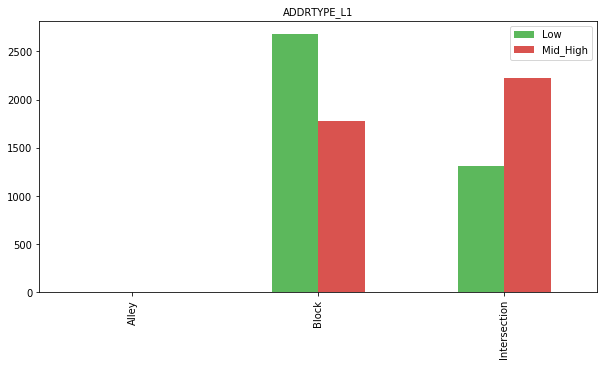

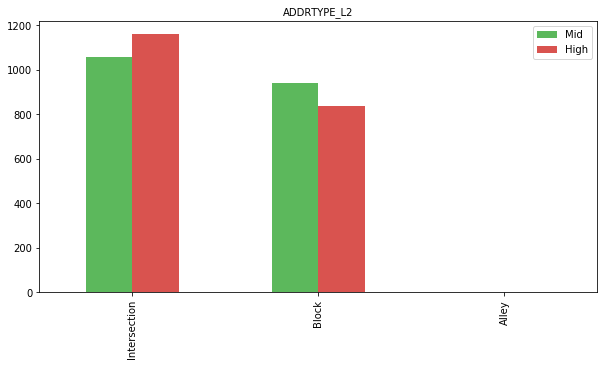

In [78]:
bar_chart('ADDRTYPE')

<span style="color:blue">
we can find that when the accident is happened at a "Block", it has a higher probability to have a lower severity. the reason could be that the traffic condition there is usuall less complicated than at an intersection.  
      
we can also notic that "Alley" has few/no sample, and after investigate in the original list, there are indeed too few samples. and since it has a similar pattern as "Block" (more Low's than High's), let bin them together.
</span>

In [79]:
# use 0 to represent block and alley, 1 for intersection
df_clean.ADDRTYPE.replace(['Block','Alley'],0,inplace=True)
df_clean.ADDRTYPE.replace('Intersection',1,inplace=True)

# copy action to df_valid
df_valid.ADDRTYPE.replace(['Block','Alley'],0,inplace=True)
df_valid.ADDRTYPE.replace('Intersection',1,inplace=True)

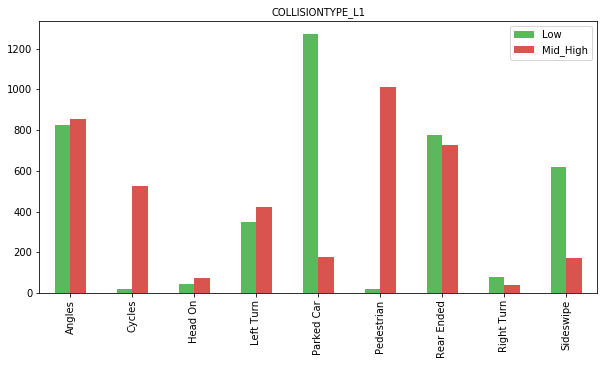

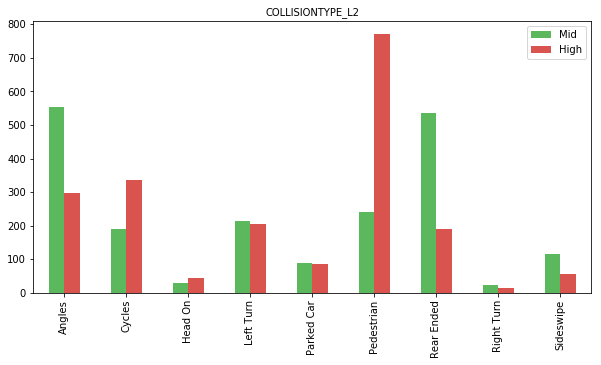

In [80]:
bar_chart('COLLISIONTYPE')

<span style="color:blue">
this chart shows that if the accident is just a sideswipe, it's usually a lower severity. but when it's a head-on, then the opposite.  
    
but if it involves cycles or pedestrians, very likely it'll be a higher severity since someone is probably injured.  
and we can also notice that the pattens are a bit different for some types between L1, L2 comparison.
</span>

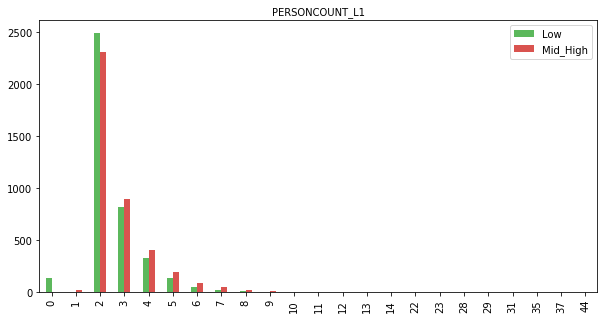

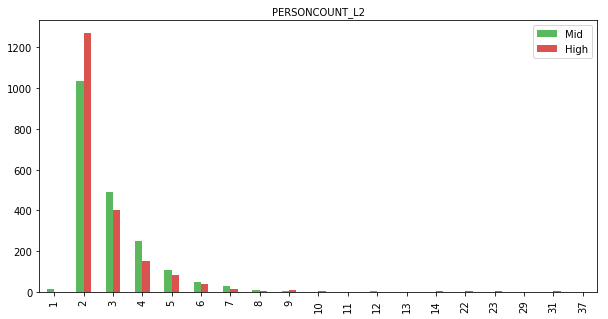

In [81]:
bar_chart('PERSONCOUNT')

<span style="color:blue">
in L1 comparison, as the number of involved people increases, it's more likely to have a higher severity. since more people means a higher possiblity to have people injured.    
    
while in L2, when it's certian there are injuries, 2-person cases outstand as an exception, the reason could be that there are more cases of dirver against non-driver (cyclist, pedestrain) in this category, let's verify below.    
</span>

In [82]:
df_clean[(df_clean.L2=='High')].COLLISIONTYPE.value_counts()

Pedestrian    771
Cycles        336
Angles        299
Left Turn     206
Rear Ended    189
Parked Car     86
Sideswipe      55
Head On        43
Right Turn     15
Name: COLLISIONTYPE, dtype: int64

<span style="color:blue">
since this is a numeric value, let's just leave it be. but 2 takes the dominance, so we bin them into (0,1), 2, (3,4,...)
</span>

In [83]:
# bin 
df_clean.PERSONCOUNT.replace([0,1],1,inplace=True)
df_clean.PERSONCOUNT.replace(list(range(3,50)),3,inplace=True)

# copy action
df_valid.PERSONCOUNT.replace([0,1],1,inplace=True)
df_valid.PERSONCOUNT.replace(list(range(3,50)),3,inplace=True)

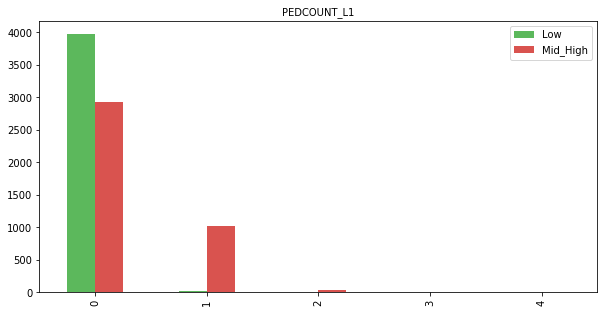

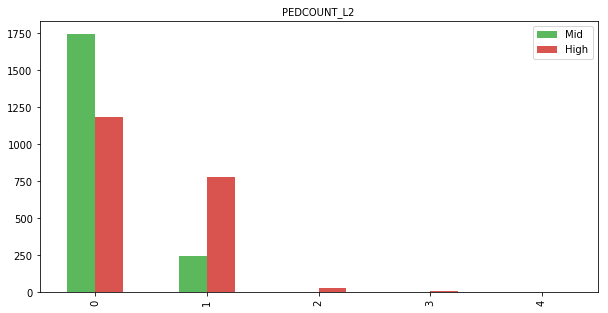

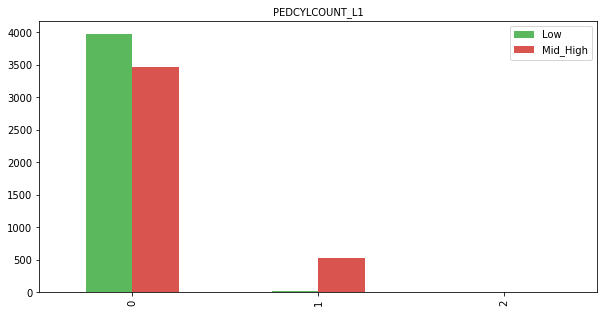

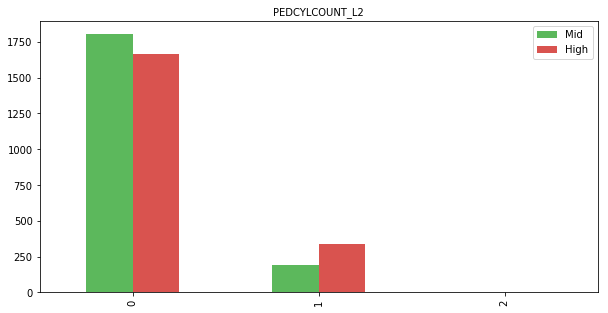

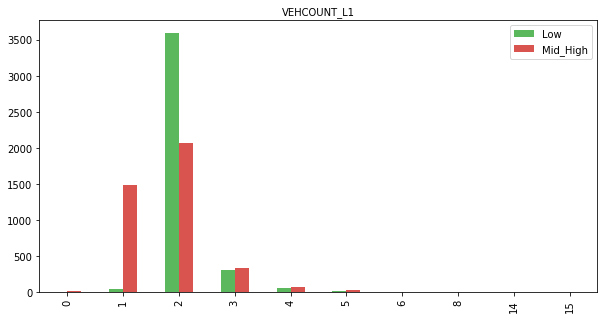

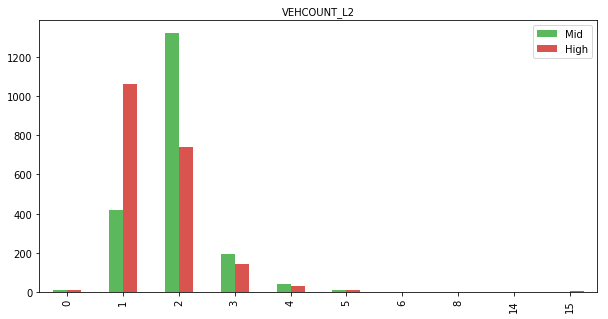

In [84]:
bar_chart('PEDCOUNT')
bar_chart('PEDCYLCOUNT')
bar_chart('VEHCOUNT')

<span style="color:blue">
the findings from above three charts are corelated, and are also reflected by the "COLLISIONTYPE", where we've already found out that when cycles or pedestrians are involved, usually it will have a high severity. that's the reason why the pattens are opposite between 0 and 1 for "PEDCOUNT" and "PEDCYLCOUNT"
    
and it also explains why a single vehcile accident is more likely to have a high severity, because in those cases, the car probably hit cycles or pedestrians.  
</span>

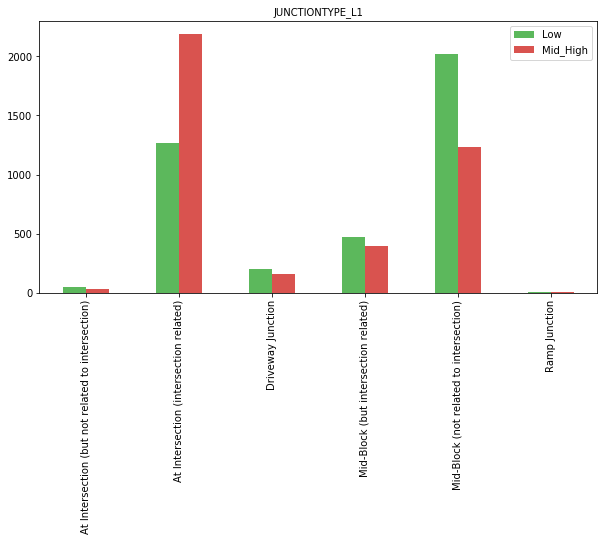

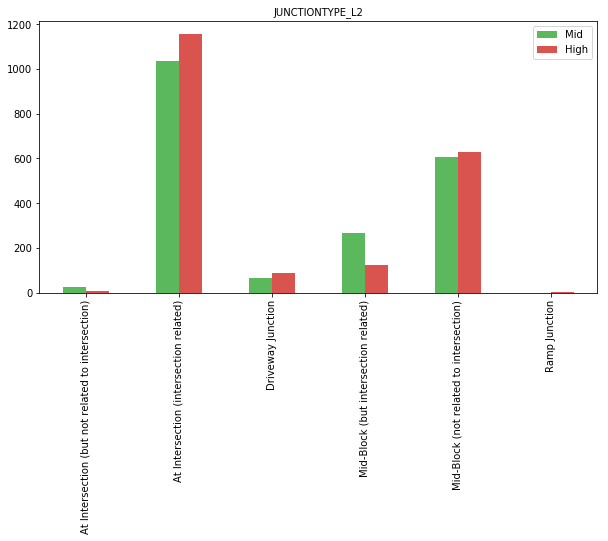

In [85]:
bar_chart('JUNCTIONTYPE')

<span style="color:blue">
if we recall the findings from the first chart "ADDRTYPE", we can find out that they just reinforce to each other, so that we can consider to skip.
</span>

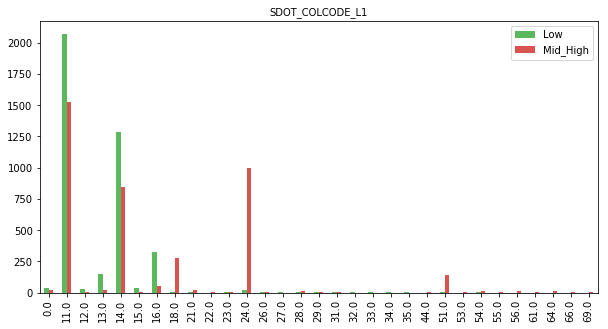

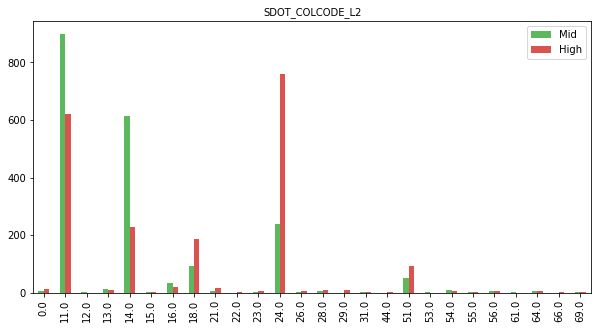

In [86]:
bar_chart('SDOT_COLCODE')

<span style="color:blue">
let's pick out the code's with most cases, which are 11,14,16,18,24,51, and check their description as below:  
</span>
  
11	MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE  
14	MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END  
16	MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE  
18	MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE  
24	MOTOR VEHCILE STRUCK PEDESTRIAN  
51	PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE  
  
<span style="color:blue">
well, based on the description,we can notice that code-11 in this chart seems to be outstanding, but if look closely, we'll find that code-18 and code-51 should also be counted in as "Angle", so that the number of cases are actully quite balanced. and code-16, code-18, code-24 can also reinforce the findings from "COLLISIONTYPE".  
    
Let's convert the values into dummies
</span>

In [87]:
df_clean.SDOT_COLCODE = pd.Categorical(df_clean.SDOT_COLCODE)
df_clean['code'] = df_clean.SDOT_COLCODE.cat.codes
df_clean.SDOT_COLCODE=df_clean.code

# copy action
df_valid.SDOT_COLCODE = pd.Categorical(df_valid.SDOT_COLCODE)
df_valid['code'] = df_valid.SDOT_COLCODE.cat.codes
df_valid.SDOT_COLCODE=df_valid.code

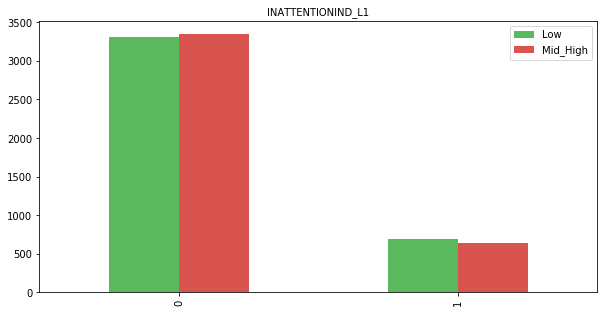

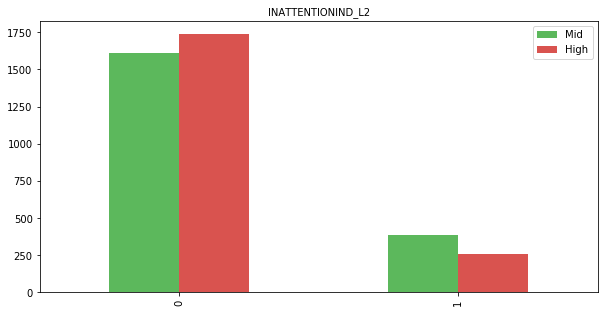

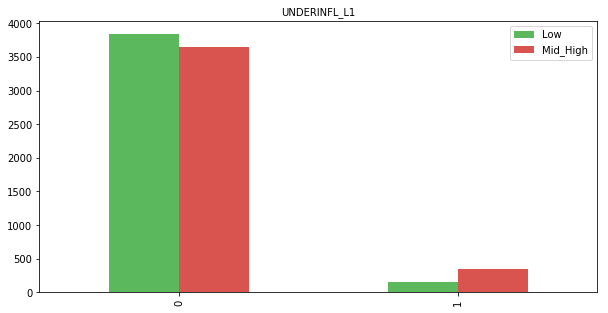

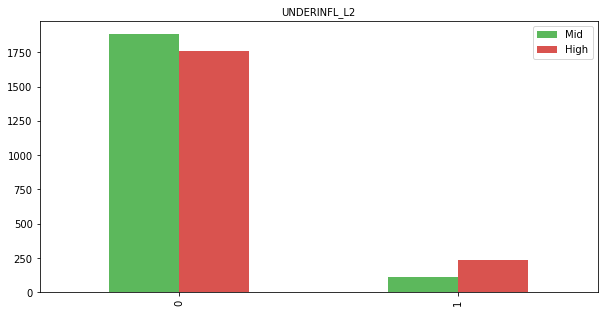

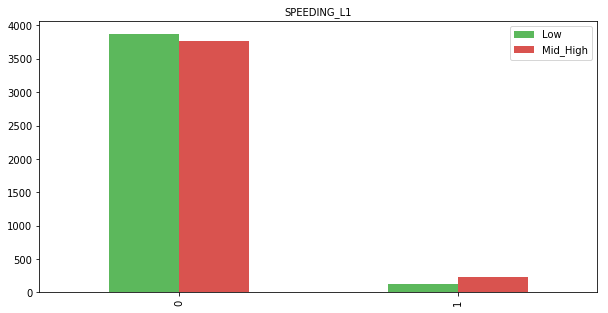

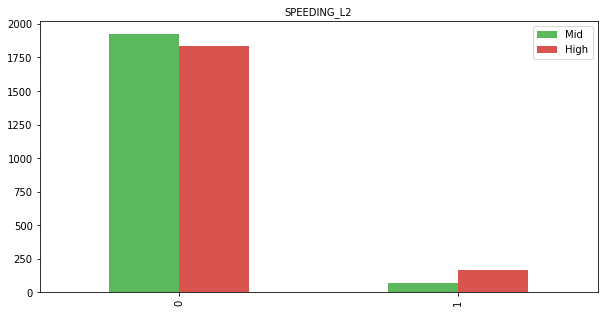

In [88]:
bar_chart('INATTENTIONIND')
bar_chart('UNDERINFL')
bar_chart('SPEEDING')

<span style="color:blue">
generally, if an accident is due to the driver's subjective mistake (under influence of drug/alcohol, or speeding), more likely it ill have a higher severity.  
    
while inattention doesn't seems to be valuable in L1 prediction, but it's useful for L2
</span>

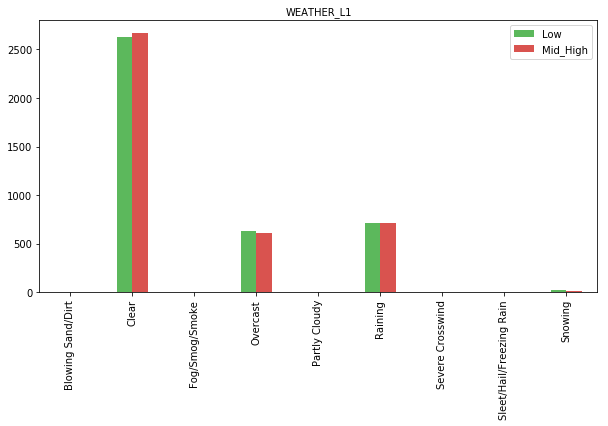

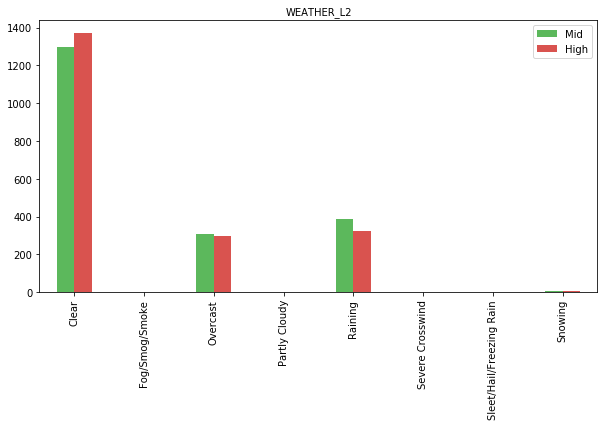

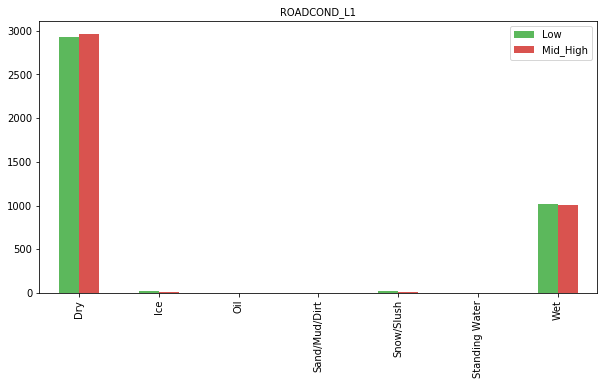

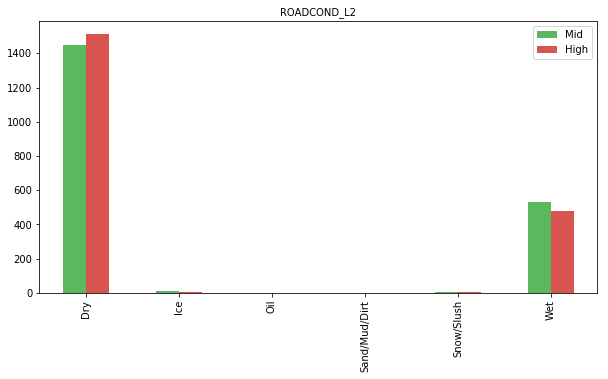

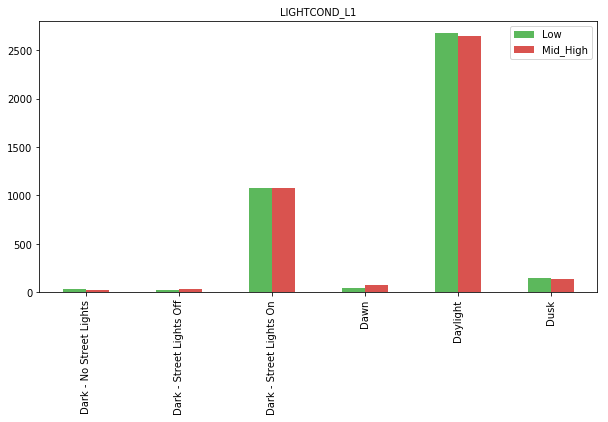

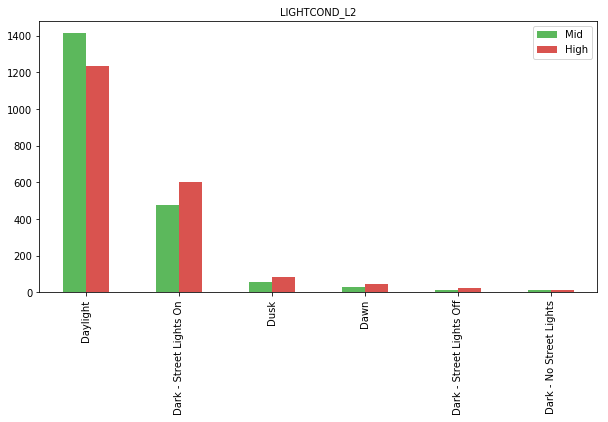

In [89]:
bar_chart('WEATHER')
bar_chart('ROADCOND')
bar_chart('LIGHTCOND')

<span style="color:blue">
well, the result of weather and road condition are a bit couter intuition, that a "Dry" condition actually means a higher severity. I can only guess that the vehicle speed is tend to be higher when the weather is better, which result in a higher severity when there is an accident.  
    
but the light condition shows what's expected.  
    
we can consider to combine weather and road as one feature "Trafficcon", and bin the value into "Good=1" and "Bad=0" based on the value description. and bin light condition into "Good=1" and "Bad=0".
</span>

In [90]:
# prepare value list
replace_wea=list(df_clean.WEATHER.unique())
replace_wea.remove('Clear')

replace_rd=list(df_clean.ROADCOND.unique())
replace_rd.remove('Dry')

replace_li=list(df_clean.LIGHTCOND.unique())
replace_li.remove('Daylight')

# replace values with 0, 1
df_clean.WEATHER.replace('Clear',1,inplace=True)
df_clean.WEATHER.replace(replace_wea,0,inplace=True)

df_clean.ROADCOND.replace('Dry',1,inplace=True)
df_clean.ROADCOND.replace(replace_rd,0,inplace=True)

df_clean.LIGHTCOND.replace('Daylight',1,inplace=True)
df_clean.LIGHTCOND.replace(replace_li,0,inplace=True)

# build new feature Trafficcon
df_clean['Trafficcon']=df_clean['WEATHER']*df_clean['ROADCOND']



# copy action
replace_wea=list(df_valid.WEATHER.unique())
replace_wea.remove('Clear')

replace_rd=list(df_valid.ROADCOND.unique())
replace_rd.remove('Dry')

replace_li=list(df_valid.LIGHTCOND.unique())
replace_li.remove('Daylight')

# replace values with 0, 1
df_valid.WEATHER.replace('Clear',1,inplace=True)
df_valid.WEATHER.replace(replace_wea,0,inplace=True)

df_valid.ROADCOND.replace('Dry',1,inplace=True)
df_valid.ROADCOND.replace(replace_rd,0,inplace=True)

df_valid.LIGHTCOND.replace('Daylight',1,inplace=True)
df_valid.LIGHTCOND.replace(replace_li,0,inplace=True)

# build new feature Trafficcon
df_valid['Trafficcon']=df_valid['WEATHER']*df_valid['ROADCOND']

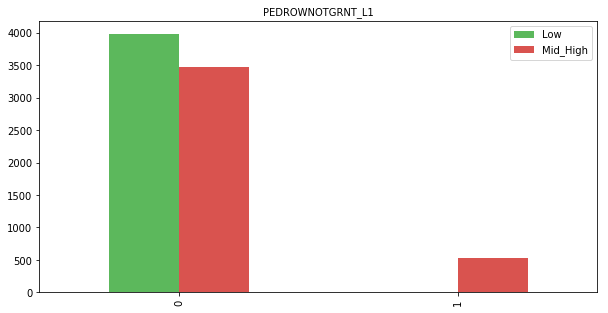

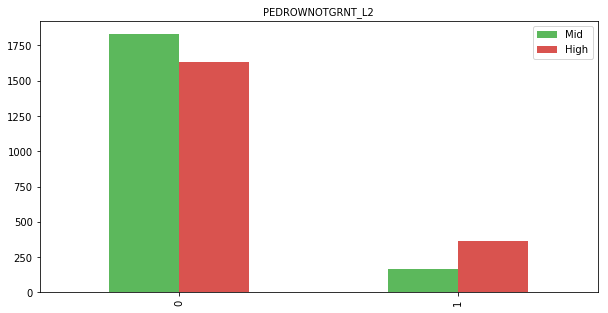

In [91]:
bar_chart('PEDROWNOTGRNT')

<span style="color:blue">
obviously, if the pedestrain is walking in the wrong place, the cases usually have a high severity. 
</span>

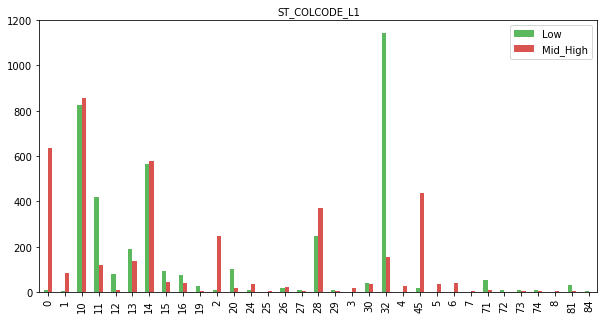

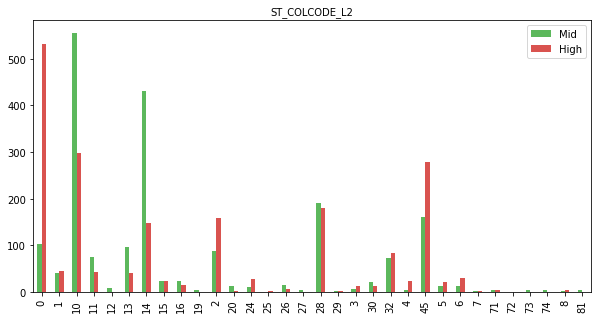

In [92]:
bar_chart('ST_COLCODE')

<span style="color:blue">
by reading the file "Metadata", we'll see that the result shown here, just reflects the findings in "COLLISIONTYPE", but is broken down into more detailed categories. let's convert it.
</span>

In [93]:
df_clean.ST_COLCODE = pd.Categorical(df_clean.ST_COLCODE)
df_clean['code'] = df_clean.ST_COLCODE.cat.codes
df_clean.ST_COLCODE=df_clean.code

# copy action
df_valid.ST_COLCODE = pd.Categorical(df_valid.ST_COLCODE)
df_valid['code'] = df_valid.ST_COLCODE.cat.codes
df_valid.ST_COLCODE=df_valid.code

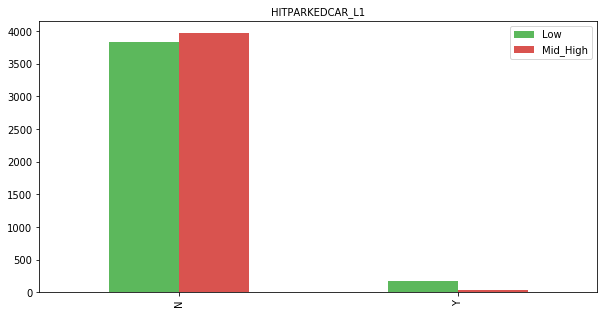

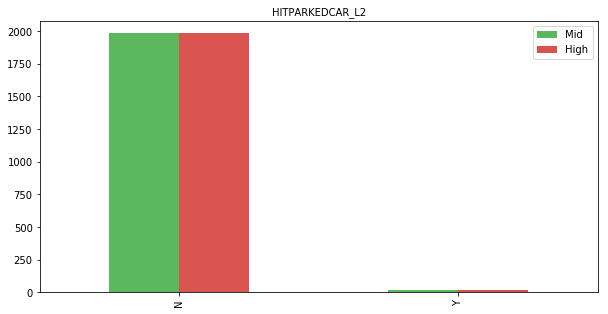

In [94]:
bar_chart('HITPARKEDCAR')

<span style="color:blue">
this is also a sub-feature of "COLLISIONTYPE", whether a parked car is hit, let's skip it.
</span>

In [95]:
# reset index
df_clean.reset_index(inplace=True)
df_clean.drop('index',axis=1,inplace=True)

# copy action
df_valid.reset_index(inplace=True)

KeyError: "['index'] not found in axis"

<span style="color:blue">
now let's convert "COLLISIONTYPE" into one-hot features.
</span>

In [98]:
df_dummy=pd.get_dummies(df_clean.COLLISIONTYPE)
df_clean=pd.concat([df_clean,df_dummy],axis=1)

# copy action
df_dummy=pd.get_dummies(df_valid.COLLISIONTYPE)
df_valid=pd.concat([df_valid,df_dummy],axis=1)

<span style="color:blue">
let's prepare the feature_lists
</span>

In [99]:
# get all column names
col_name=list(df_clean.columns)

# copy what's needed as feature list
feature_list=['ADDRTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'SDOT_COLCODE',
 'INATTENTIONIND',
 'UNDERINFL',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SPEEDING',
 'ST_COLCODE',
 'Trafficcon',
 'Angles',
 'Cycles',
 'Head On',
 'Left Turn',
 'Parked Car',
 'Pedestrian',
 'Rear Ended',
 'Right Turn',
 'Sideswipe']


In [251]:
# backup
feature_list=['ADDRTYPE',
 
 'INATTENTIONIND',
 'UNDERINFL',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SPEEDING',
 
 'Trafficcon',
 'Angles',
 'Cycles',
 'Head On',
 'Left Turn',
 'Parked Car',
 'Pedestrian',
 'Rear Ended',
 'Right Turn',
 'Sideswipe']

<span style="color:blue">
let's check data type
</span>

In [101]:
df_clean[feature_list].dtypes

ADDRTYPE          int64
INATTENTIONIND    int64
UNDERINFL         int64
LIGHTCOND         int64
PEDROWNOTGRNT     int64
SPEEDING          int64
Trafficcon        int64
Angles            uint8
Cycles            uint8
Head On           uint8
Left Turn         uint8
Parked Car        uint8
Pedestrian        uint8
Rear Ended        uint8
Right Turn        uint8
Sideswipe         uint8
dtype: object

<span style="color:blue">
data type looks good, no need to do formating.  
  
***
before modeling, let's shuffle the data as now it's highly orgnized as [Low, Mid, High], then the data set will be devided into training and test data by 80%/20%, and there will be two groups fror L1, L2 modeling.
</span>

In [102]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

<span style="color:blue">
shuffle data
</span>

In [252]:
df_clean=df_clean.sample(frac=1).reset_index(drop=True)

In [253]:
# get features and labels
X_L1=df_clean[feature_list]
X_L2=df_clean[df_clean.L1=='Mid_High'][feature_list]

y_L1=df_clean.L1.values
y_L2=df_clean[df_clean.L1=='Mid_High'].L2.values

In [254]:
# feature Normalization
X_L1= preprocessing.StandardScaler().fit(X_L1).transform(X_L1)
X_L2= preprocessing.StandardScaler().fit(X_L2).transform(X_L2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [255]:
# devide data set
X_train1, X_test1, y_train1, y_test1 = train_test_split( X_L1, y_L1, test_size=0.2, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split( X_L2, y_L2, test_size=0.2, random_state=1)
print ('Train set1:', X_train1.shape,  y_train1.shape)
print ('Test set1:', X_test1.shape,  y_test1.shape)
print ('Train set2:', X_train2.shape,  y_train2.shape)
print ('Test set2:', X_test2.shape,  y_test2.shape)

Train set1: (6400, 16) (6400,)
Test set1: (1600, 16) (1600,)
Train set2: (3200, 16) (3200,)
Test set2: (800, 16) (800,)


<span style="color:blue">
as the training and test data are ready now, let's try different models and evaluate.  
    
KNN, decission tree, SVM, and logistic regression 
</span>

In [256]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# try different Ks from 1 to 9, get a list of accuracy scores for each K
Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    KNN_L1 = KNeighborsClassifier(n_neighbors = n).fit(X_train1,y_train1)
    yhat=KNN_L1.predict(X_test1)
    mean_acc[n-1] = metrics.accuracy_score(y_test1, yhat)

print( "The best accuracy of KNN_L1 was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    KNN_L2 = KNeighborsClassifier(n_neighbors = n).fit(X_train2,y_train2)
    yhat=KNN_L2.predict(X_test2)
    mean_acc[n-1] = metrics.accuracy_score(y_test2, yhat)

print( "The best accuracy of KNN_L2 was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy of KNN_L1 was with 0.718125 with k= 9
The best accuracy of KNN_L2 was with 0.6125 with k= 7


<span style="color:blue">
based on the result, let's try to build a complete prediction model to work on a sample from data set
</span>

In [257]:
KNN_L1 = KNeighborsClassifier(n_neighbors = 9).fit(X_train1,y_train1)
KNN_L2 = KNeighborsClassifier(n_neighbors = 7).fit(X_train2,y_train2)

In [258]:
from sklearn.tree import DecisionTreeClassifier
Depths = 10
mean_acc = np.zeros((Depths-1))

for n in range(1,Depths):
    
    #Train Model and Predict  
    Tree_L1 = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train1,y_train1)
    yhat=Tree_L1.predict(X_test1)
    mean_acc[n-1] = metrics.accuracy_score(y_test1, yhat)
 
print( "The best accuracy for L1 was with", mean_acc.max(), "with max_depth=",mean_acc.argmax()+1) 

Depths = 10
mean_acc = np.zeros((Depths-1))

for n in range(1,Depths):
    
    #Train Model and Predict  
    Tree_L2 = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train2,y_train2)
    yhat=Tree_L2.predict(X_test2)
    mean_acc[n-1] = metrics.accuracy_score(y_test2, yhat)
 
print( "The best accuracy for L2 was with", mean_acc.max(), "with max_depth=",mean_acc.argmax()+1) 

The best accuracy for L1 was with 0.723125 with max_depth= 9
The best accuracy for L2 was with 0.68 with max_depth= 9


In [259]:
Tree_L1 = DecisionTreeClassifier(criterion="entropy", max_depth = 9).fit(X_train1,y_train1)
Tree_L2 = DecisionTreeClassifier(criterion="entropy", max_depth = 9).fit(X_train2,y_train2)

In [260]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

SVM_L1 = svm.SVC(kernel='rbf').fit(X_train1,y_train1)
yhat1=SVM_L1.predict(X_test1)
f_1= f1_score(y_test1, yhat1, average='weighted') 
j_1= jaccard_similarity_score(y_test1, yhat1)
    
SVM_L2 = svm.SVC(kernel='rbf').fit(X_train2,y_train2)
yhat2=SVM_L2.predict(X_test2)
f_2= f1_score(y_test2, yhat2, average='weighted') 
j_2= jaccard_similarity_score(y_test2, yhat2)
    
print(f_1)
print(j_1)
print(f_2)
print(j_2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7224817876681183
0.7225
0.6748008765184338
0.675


In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

Log_L1 = LogisticRegression(C=0.1, solver='liblinear').fit(X_train1,y_train1)
yhat1=Log_L1.predict(X_test1)
yhat_prob1 = Log_L1.predict_proba(X_test1)
f_1 = f1_score(y_test1, yhat1, average='weighted')
j_1 = jaccard_similarity_score(y_test1, yhat1)
l_1 = log_loss(y_test1, yhat_prob1)

Log_L2 = LogisticRegression(C=0.1, solver='liblinear').fit(X_train2,y_train2)
yhat2=Log_L2.predict(X_test2)
yhat_prob2 = Log_L2.predict_proba(X_test2)
f_2 = f1_score(y_test2, yhat2, average='weighted')
j_2 = jaccard_similarity_score(y_test2, yhat2)
l_2 = log_loss(y_test2, yhat_prob2)

print(f_1)
print(j_1)
print(l_1)
print(f_2)
print(j_2)
print(l_2)

0.7263740746877494
0.728125
0.5026955307556698
0.6758779369847037
0.67625
0.6135829877137191


In [262]:
df_valid=df_valid.sample(frac=1).reset_index(drop=True)
df_v=df_valid.iloc[0:10000]

In [263]:
# KNN
df_X=df_v[feature_list]
df_test=pd.DataFrame({'predict_l':KNN_L1.predict(df_X)})
df_compare=pd.concat([df_test, df_v],axis=1)
df_compare.groupby('predict_l').L1.value_counts()

predict_l  L1      
Low        Low         4845
           Mid_High    1778
Mid_High   Low         1738
           Mid_High    1639
Name: L1, dtype: int64

In [264]:
# Tree
df_X=df_v[feature_list]
df_test=pd.DataFrame({'predict_l':Tree_L1.predict(df_X)})
df_compare=pd.concat([df_test, df_v],axis=1)
df_compare.groupby('predict_l').L1.value_counts()

predict_l  L1      
Low        Low         2469
           Mid_High     416
Mid_High   Low         4114
           Mid_High    3001
Name: L1, dtype: int64

In [265]:
# SVM
df_X=df_v[feature_list]
df_test=pd.DataFrame({'predict_l':SVM_L1.predict(df_X)})
df_compare=pd.concat([df_test, df_v],axis=1)
df_compare.groupby('predict_l').L1.value_counts()

predict_l  L1      
Low        Low         5140
           Mid_High    1909
Mid_High   Mid_High    1508
           Low         1443
Name: L1, dtype: int64

In [266]:
# Log
df_X=df_v[feature_list]
df_test=pd.DataFrame({'predict_l':Log_L1.predict(df_X)})
df_compare=pd.concat([df_test, df_v],axis=1)
df_compare.groupby('predict_l').L1.value_counts()

predict_l  L1      
Low        Low         2847
           Mid_High     333
Mid_High   Low         3736
           Mid_High    3084
Name: L1, dtype: int64

In [267]:
print('features for log model: ',feature_list)

features for log model:  ['ADDRTYPE', 'INATTENTIONIND', 'UNDERINFL', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'Trafficcon', 'Angles', 'Cycles', 'Head On', 'Left Turn', 'Parked Car', 'Pedestrian', 'Rear Ended', 'Right Turn', 'Sideswipe']


<span style="color:blue">
after several tries by adding/removing features, it seems that the log model will not work properly when mixing categorical and one-hot features, although F2 score doesn't change a lot. but on the other hand, if only keep one-hot features, most models will have the best performance when make predictions on validation data set. but each model has its own charactor.
</span>

In [272]:
# KNN
df_X=df_v[df_v.L1=='Mid_High'][feature_list]
df_test=pd.DataFrame({'predict_l':KNN_L2.predict(df_X)})
df_compare=pd.concat([df_test, df_v[df_v.L1=='Mid_High']],axis=1)
df_compare.groupby('predict_l').L2.value_counts()

predict_l  L2  
High       Mid     502
           High     11
Mid        Mid     674
           High     20
Name: L2, dtype: int64

In [273]:
# Tree
df_X=df_v[df_v.L1=='Mid_High'][feature_list]
df_test=pd.DataFrame({'predict_l':Tree_L2.predict(df_X)})
df_compare=pd.concat([df_test, df_v[df_v.L1=='Mid_High']],axis=1)
df_compare.groupby('predict_l').L2.value_counts()

predict_l  L2  
High       Mid     451
           High     11
Mid        Mid     725
           High     20
Name: L2, dtype: int64

In [274]:
# SVM
df_X=df_v[df_v.L1=='Mid_High'][feature_list]
df_test=pd.DataFrame({'predict_l':SVM_L2.predict(df_X)})
df_compare=pd.concat([df_test, df_v[df_v.L1=='Mid_High']],axis=1)
df_compare.groupby('predict_l').L2.value_counts()

predict_l  L2  
High       Mid     245
           High      6
Mid        Mid     931
           High     25
Name: L2, dtype: int64

In [271]:
# Log
df_X=df_v[df_v.L1=='Mid_High'][feature_list]
df_test=pd.DataFrame({'predict_l':Log_L2.predict(df_X)})
df_compare=pd.concat([df_test, df_v[df_v.L1=='Mid_High']],axis=1)
df_compare.groupby('predict_l').L2.value_counts()

predict_l  L2  
High       Mid     418
           High     11
Mid        Mid     758
           High     20
Name: L2, dtype: int64

<span style="color:blue">
as above, we can find that at L2 prediction, it's hard to judge the result as there are not so many high severity cases.but among those models, SVM had the best performance.
</span>